In [66]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import datasets, layers, models
from sklearn.datasets import fetch_openml

In [67]:
# Stockage de la base de données
mnist = fetch_openml('mnist_784', version=1)

In [68]:
# Stockage des features dans une variable X
X = mnist['data']

In [69]:
# Stockage des target dans une variable y
y = mnist['target']

In [70]:
# Division des données en jeu d'apprentissage et de test
X_train, y_train = X[:60000,:], y[:60000]
X_test, y_test = X[60000:,:], y[60000:]

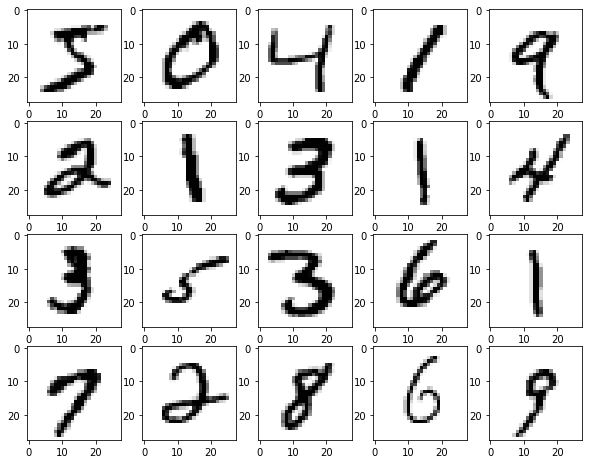

In [71]:
# Affichage des 20 premières images de la bdd
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.imshow(X[i,:].reshape(28,28), cmap=plt.cm.binary)
plt.show()

In [76]:
# On redimensionne les images pour notre réseau de neurones
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [83]:
# Transformation des labels
y_train = y_train.astype(np.uint8)
y_test = y_test.astype(np.uint8)

In [79]:
# Construction de notre modèle et ajout des différentes couches
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [80]:
# Résumé de notre modèle
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [81]:
# Compilation du modèle
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [84]:
# Entraînement du modèle 
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.2298 - accuracy: 0.9434 - val_loss: 0.0687 - val_accuracy: 0.9784
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0647 - accuracy: 0.9803 - val_loss: 0.0586 - val_accuracy: 0.9816
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0495 - accuracy: 0.9852 - val_loss: 0.0435 - val_accuracy: 0.9858
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0436 - accuracy: 0.9867 - val_loss: 0.0444 - val_accuracy: 0.9851
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0343 - accuracy: 0.9897 - val_loss: 0.0564 - val_accuracy: 0.9832
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0331 - accuracy: 0.9901 - val_loss: 0.0491 - val_accuracy: 0.9860
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0257 - accuracy: 0.9923 - val_loss: 0.0464 -